In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
df=pd.read_csv("C:\\Users\\thanm\\Downloads\\student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.shape

(25, 2)

In [6]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
#Fillimg Null Values
df = df.fillna(value=0)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
df.isnull().sum().sum()

0

In [10]:
df.dropna()
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


<AxesSubplot:xlabel='Scores', ylabel='Hours'>

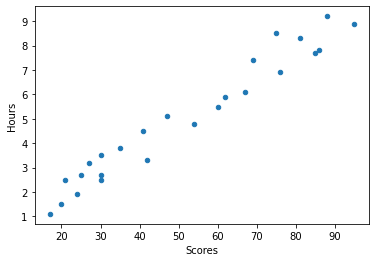

In [67]:
# check the distribution of data by plotting as scatter
df.plot(x='Scores', y='Hours', kind='scatter')	

In [96]:
x = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [97]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [71]:
#step1 ::: seperate data as features and labels

x=df[['Scores']]
y=df['Hours']

Now Machine Learning

In [98]:
#step2: import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#step3: split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [99]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print("**************")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(25, 1)
(20, 1)
(5, 1)
**************
(25,)
(20,)
(5,)


In [75]:
# create a linear regression model
model = LinearRegression()


# train the model using training data
# since we have only one independent variable, you should use 'values.reshape(-1,1)'. Otherwise, x_train is enough.
model.fit(x_train.values.reshape(-1,1), y_train) 

In [77]:
# print coefficient
model.coef_

# print y_intercept | bias
model.intercept

array([0.09601292])

In [103]:
Scores=sm.OLS(y_train,x_train).fit()

In [105]:
print(Scores.params)      

Hours    10.077702
dtype: float64


In [106]:
# make predictions using test data
y_pred = model.predict(x_test.values.reshape(-1,1))

In [107]:
# let's calculate the metrics
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  2081.0410192627523


In [108]:
# RMSE
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  45.61842850496664


In [87]:
# import plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Predicted')

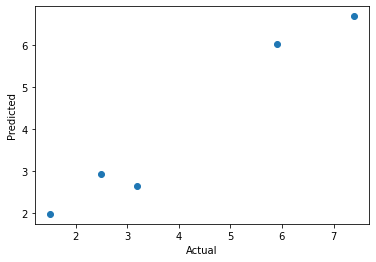

In [88]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0.5, 1.0, 'Linear Regression')

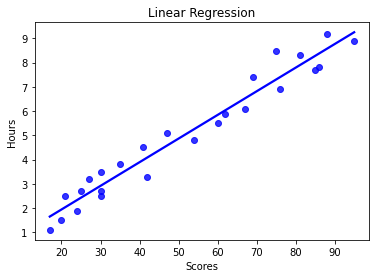

In [95]:
# plot regression model line
sns.regplot(x=x, y=y, ci=None, color ='blue')
plt.title('Linear Regression')
